In [1]:
# Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ac77fd6de108f3b06b3daf794b2c11d"

In [4]:
# Create a set of random latitude and longitude combinations

# creating variables for latitudes and longitudes

lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)

# pack the latitudes and longitudes as pairs by zipping them with the zip() function

lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [6]:
# import citipy

from citipy import citipy

In [7]:
# Create a list for holding the cities.

cities = []
city_data = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

619

In [8]:
# Print the beginning of the logging. 

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lake charles
Processing Record 2 of Set 1 | kavarna
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | olonets
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | kaeo
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | kijang
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | hofn
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | pavlodar
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | mar del plata
Processing Record 23 of Set 1 | abha
Processing Record 24 of Set 1 | celestun
Processing Recor

Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | srednekolymsk
Processing Record 43 of Set 4 | rocha
Processing Record 44 of Set 4 | manaus
Processing Record 45 of Set 4 | praia
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | kenora
Processing Record 48 of Set 4 | masakin
Processing Record 49 of Set 4 | gornyy
Processing Record 50 of Set 4 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | labuhan
Processing Record 2 of Set 5 | timra
Processing Record 3 of Set 5 | stillwater
Processing Record 4 of Set 5 | salta
Processing Record 5 of Set 5 | lhokseumawe
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | menongue
Processing Record 8 of Set 5 | alta floresta
Processing Record 9 of Set 5 | khatanga
Processing Record 10 of Set 5 | prainha
Processing Record 11 of Set 5 | oudtshoorn
Processing Record 12 of Set 5 | huarmey
Processing Record 13 of Set 5 | tucurui
Processing Record 14 of Set 5 | vao
Process

Processing Record 28 of Set 8 | half moon bay
Processing Record 29 of Set 8 | constitucion
Processing Record 30 of Set 8 | luanda
Processing Record 31 of Set 8 | saint anthony
Processing Record 32 of Set 8 | samarinda
Processing Record 33 of Set 8 | suphan buri
Processing Record 34 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 35 of Set 8 | agva
City not found. Skipping...
Processing Record 36 of Set 8 | wenling
Processing Record 37 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 38 of Set 8 | mehamn
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | zhigansk
Processing Record 41 of Set 8 | keta
Processing Record 42 of Set 8 | pangnirtung
Processing Record 43 of Set 8 | tura
Processing Record 44 of Set 8 | el wasta
City not found. Skipping...
Processing Record 45 of Set 8 | okulovka
Processing Record 46 of Set 8 | tagusao
Processing Record 47 of Set 8 | sirsi
Processing Record 48 of Set 8 | da lat
P

Processing Record 17 of Set 12 | shingu
Processing Record 18 of Set 12 | necochea
Processing Record 19 of Set 12 | sun valley
Processing Record 20 of Set 12 | severo-kurilsk
Processing Record 21 of Set 12 | nome
Processing Record 22 of Set 12 | opuwo
Processing Record 23 of Set 12 | panjab
Processing Record 24 of Set 12 | milkovo
Processing Record 25 of Set 12 | ingham
Processing Record 26 of Set 12 | bam
Processing Record 27 of Set 12 | huaihua
Processing Record 28 of Set 12 | la orilla
Processing Record 29 of Set 12 | riverton
Processing Record 30 of Set 12 | yulara
Processing Record 31 of Set 12 | kupang
Processing Record 32 of Set 12 | el dovio
Processing Record 33 of Set 12 | mayumba
Processing Record 34 of Set 12 | swan river
Processing Record 35 of Set 12 | vysokogornyy
Processing Record 36 of Set 12 | shawnee
Processing Record 37 of Set 12 | the valley
Processing Record 38 of Set 12 | praia da vitoria
Processing Record 39 of Set 12 | sobolevo
Processing Record 40 of Set 12 | ca

In [10]:
len(cities)

619

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lake Charles,30.21,-93.20,93.00,49,5,6.93,US,2020-06-15 21:44:03
1,Kavarna,43.43,28.33,64.40,100,40,3.36,BG,2020-06-15 21:44:03
2,Ushuaia,-54.80,-68.30,42.80,70,40,5.82,AR,2020-06-15 21:44:03
3,Olonets,60.98,32.97,59.85,76,0,1.54,RU,2020-06-15 21:44:04
4,Kapaa,22.08,-159.32,82.99,65,20,13.87,US,2020-06-15 21:39:35
5,Thompson,55.74,-97.86,68.00,77,75,3.36,CA,2020-06-15 21:44:04
6,Qaanaaq,77.48,-69.36,34.61,87,0,4.72,GL,2020-06-15 21:44:04
7,Clyde River,70.47,-68.59,32.00,96,90,21.92,CA,2020-06-15 21:44:04
8,Mataura,-46.19,168.86,46.99,80,49,4.61,NZ,2020-06-15 21:44:05
9,Carnarvon,-24.87,113.63,65.26,30,0,16.53,AU,2020-06-15 21:40:38


In [12]:
# Reorder the DataFrame columns

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lake Charles,US,2020-06-15 21:44:03,30.21,-93.20,93.00,49,5,6.93
1,Kavarna,BG,2020-06-15 21:44:03,43.43,28.33,64.40,100,40,3.36
2,Ushuaia,AR,2020-06-15 21:44:03,-54.80,-68.30,42.80,70,40,5.82
3,Olonets,RU,2020-06-15 21:44:04,60.98,32.97,59.85,76,0,1.54
4,Kapaa,US,2020-06-15 21:39:35,22.08,-159.32,82.99,65,20,13.87
5,Thompson,CA,2020-06-15 21:44:04,55.74,-97.86,68.00,77,75,3.36
6,Qaanaaq,GL,2020-06-15 21:44:04,77.48,-69.36,34.61,87,0,4.72
7,Clyde River,CA,2020-06-15 21:44:04,70.47,-68.59,32.00,96,90,21.92
8,Mataura,NZ,2020-06-15 21:44:05,-46.19,168.86,46.99,80,49,4.61
9,Carnarvon,AU,2020-06-15 21:40:38,-24.87,113.63,65.26,30,0,16.53


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Scatter Plots


In [14]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592257574.5633888

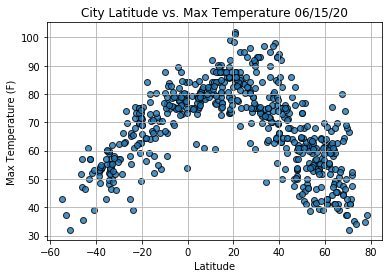

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

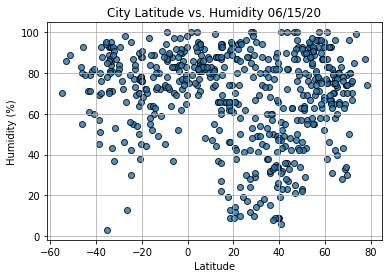

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

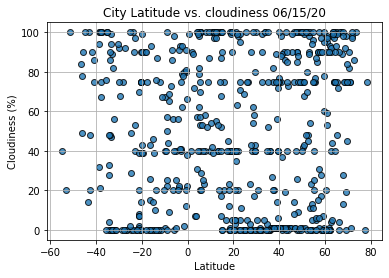

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

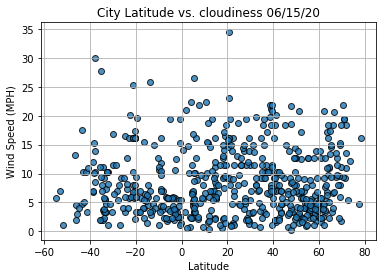

In [19]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Linear Regression

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  

from scipy import stats
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
# create a new DataFram from the current city_data_df

index13 = city_data_df.loc[13]
index13

City                    Upernavik
Country                        GL
Date          2020-06-15 21:44:06
Lat                         72.79
Lng                        -56.15
Max Temp                    35.19
Humidity                       85
Cloudiness                     86
Wind Speed                   5.35
Name: 13, dtype: object

In [39]:
city_data_df["Lat"] >=0

0       True
1       True
2      False
3       True
4       True
       ...  
569     True
570    False
571     True
572     True
573     True
Name: Lat, Length: 574, dtype: bool

In [40]:
# Return a DataFrame with all data fitting the criter, for latitudes greather than or equal to 0

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lake Charles,US,2020-06-15 21:44:03,30.21,-93.20,93.00,49,5,6.93
1,Kavarna,BG,2020-06-15 21:44:03,43.43,28.33,64.40,100,40,3.36
2,Ushuaia,AR,2020-06-15 21:44:03,-54.80,-68.30,42.80,70,40,5.82
3,Olonets,RU,2020-06-15 21:44:04,60.98,32.97,59.85,76,0,1.54
4,Kapaa,US,2020-06-15 21:39:35,22.08,-159.32,82.99,65,20,13.87


In [41]:
# Assign this DataFrame to the variable northern_hemi_df
# Do the same with souther hemisphere latitudes

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


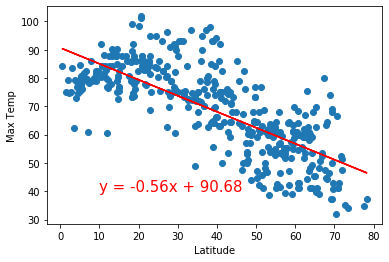

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

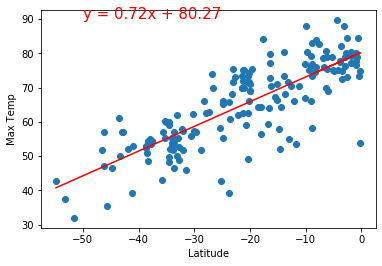

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
					   'Max Temp',(-50,90))

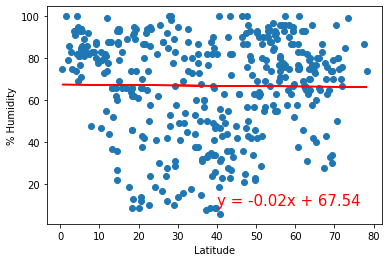

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", 
					   '% Humidity',(40, 10))


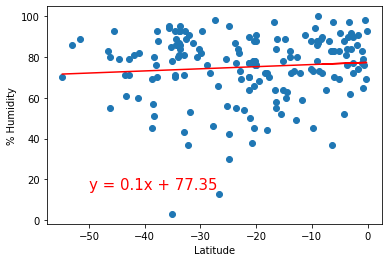

In [28]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", 
					   '% Humidity',(-50, 15))


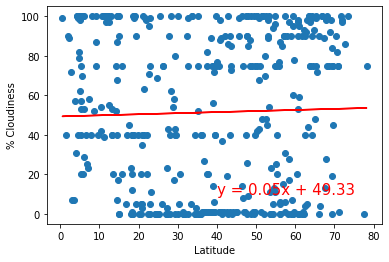

In [29]:
# Linear regression for northern hemispherse and cloudiness

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the Function

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", 
					   '% Cloudiness',(40, 10))

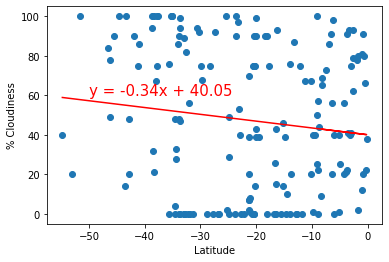

In [30]:
# Linear regression for northern hemispherse and cloudiness

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", 
					   '% Cloudiness',(-50, 60))

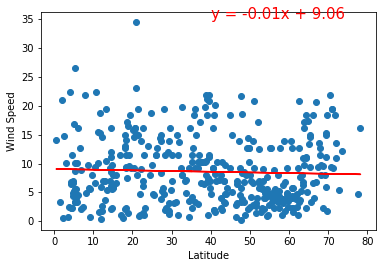

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed", 
					   'Wind Speed',(40, 35))

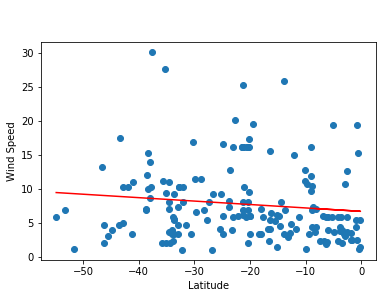

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", 
					   'Wind Speed',(-50, 35))